In [2]:
import pandas as pd

**Load the Data**

In [3]:
df = pd.read_csv("bakery_sales.csv")

In [4]:
#Display first few rows 
df.head()

,Date,Item,Price,Quantity Sold,Total Revenue
0,01-02-2025,Sourdough,6.0,10,60.0
1,01-02-2025,Brownie,3.5,1,3.5
2,01-02-2025,Croissant,3.0,1,3.0
3,01-02-2025,Croissant,3.0,6,18.0
4,01-02-2025,Cinnamon Roll,3.8,5,19.0


**Descriptive Statistics**

In [5]:
# summery satatistics
df.describe()

,Price,Quantity Sold,Total Revenue
count,287.000000,287.000000,287.000000
mean,3.748084,5.449477,20.166202
std,1.202702,2.983063,13.029225
min,2.000000,1.000000,2.000000
25%,2.500000,3.000000,10.000000
50%,3.800000,5.000000,18.000000
75%,5.000000,8.000000,29.000000
max,6.000000,10.000000,60.000000


In [6]:
# top 5 best selling items
top_items = df.groupby("Item")["Quantity Sold"].sum().sort_values(ascending=False).head(5)
print("Top 5 Best Selling Items: \n",top_items)

Top 5 Best Selling Items: 
 Item
Muffin       284
Baguette     218
Danish       189
Brownie      185
Sourdough    181
Name: Quantity Sold, dtype: int64


**Probability & Distribution**

In [7]:
pip install matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


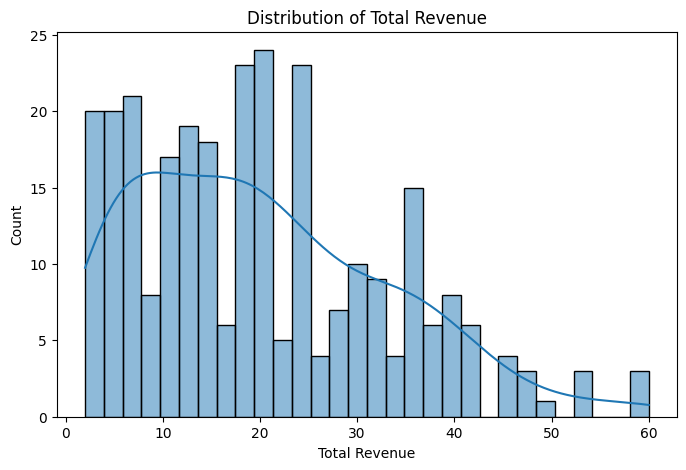

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Histogram of Total Revenue
plt.figure(figsize=(8,5))
sns.histplot(df["Total Revenue"], bins=30, kde=True)
plt.title("Distribution of Total Revenue")
plt.show()

**Hypothesis Testing**

In [9]:
from scipy.stats import ttest_ind

#Convert Date to Weekday (0=Monday, 6=Sunday)
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True, errors='coerce')  # Convert to datetime format
df["Weekday"] = df["Date"].dt.weekday  # Extract weekday (0=Monday, 6=Sunday)

#Separating Weekend and Weekday Sales
weekend_sales = df[df["Weekday"] >= 5]["Total Revenue"]
weekday_sales = df[df["Weekday"] < 5]["Total Revenue"]

#Performing the T-test
t_stat, p_value = ttest_ind(weekend_sales, weekday_sales)

#Printing the Results
print(f"T-test result: t-statistic={t_stat}, p-value={p_value}")

#Interpreting the Results
if p_value < 0.05:
    print("Weekend sales are significantly higher than weekday sales.")
else:
    print("No significant difference between weekend and weekday sales.")


T-test result: t-statistic=-1.5773467989309775, p-value=0.11592236057257084
No significant difference between weekend and weekday sales.


**Correlation & Regression**

In [17]:
from sklearn.linear_model import LinearRegression

#calculate correlation
correlation = df["Price"].corr(df["Quantity Sold"])
print(f"Correlation between Price and Quantity Sold : {correlation}")

#build linear regression model
X = df[["Price"]]
y = df["Total Revenue"]

model = LinearRegression()
model.fit(X,y)

#predict and check results
df["Predicted Revenue"] = model.predict(X)
print(df.head())

Correlation between Price and Quantity Sold : -0.07241338208382125
        Date           Item  Price  Quantity Sold  Total Revenue  Weekday  \
0 2025-02-01      Sourdough    6.0             10           60.0      5.0   
1 2025-02-01        Brownie    3.5              1            3.5      5.0   
2 2025-02-01      Croissant    3.0              1            3.0      5.0   
3 2025-02-01      Croissant    3.0              6           18.0      5.0   
4 2025-02-01  Cinnamon Roll    3.8              5           19.0      5.0   

   Predicted Revenue  
0          31.220808  
1          18.948365  
2          16.493877  
3          16.493877  
4          20.421058  
